In [3]:
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from Word2VecUtility import Word2VecUtility
import pandas as pd
import numpy as np
import glob
import nltk
import xmltodict



In [4]:
nltk.download(['stopwords','wordnet'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juanespe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/juanespe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
with open('../xml_parser/papers-dc.xml') as fd:
    doc = xmltodict.parse(fd.read())

In [6]:
def id_doc(record):
    return record['header']['identifier'].split(":")[2]

In [7]:
def document_meta_data(record):
    return ','.join(map(str,[record['metadata']['oai_dc:dc']['dc:title'],
        ' '.join(map(str,record['metadata']['oai_dc:dc']['dc:subject']))]))

In [8]:
def build_data(d):
    values = dict()
    for a in d['OAI-PMH']['ListRecords']['record']:
        values[id_doc(a)] = document_meta_data(a)
    return values

In [9]:
h = build_data(doc)

In [10]:
clean_train_words = []

for key, value in h.items():
    clean_train_words.append(" ".join(Word2VecUtility.review_to_wordlist(value, True)))
    

/Users/juanespe/projects/master_on_data_science/fundamentos_en_ciencias_de_los_datos/text-mining-applied-project/second_approach/Word2VecUtility.py:28: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 28 of the file /Users/juanespe/projects/master_on_data_science/fundamentos_en_ciencias_de_los_datos/text-mining-applied-project/second_approach/Word2VecUtility.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  review_text = BeautifulSoup(review).get_text()


In [11]:
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = None)

In [12]:
train_data_features = vectorizer.fit_transform(clean_train_words)

# Numpy arrays are easy to work with, so convert the result to an
# array
print(train_data_features)

  (0, 1856)	1
  (0, 1606)	1
  (0, 323)	1
  (0, 1323)	1
  (0, 1705)	1
  (0, 894)	2
  (0, 1440)	2
  (0, 603)	1
  (0, 582)	1
  (0, 586)	1
  (0, 1685)	1
  (1, 914)	1
  (1, 837)	1
  (1, 1691)	1
  (1, 1819)	1
  (1, 1917)	1
  (1, 737)	1
  (1, 62)	1
  (1, 626)	1
  (1, 1393)	1
  (1, 467)	1
  (1, 56)	1
  (1, 1606)	2
  (1, 323)	4
  (2, 53)	1
  :	:
  (977, 938)	1
  (977, 720)	1
  (977, 72)	1
  (977, 1606)	2
  (977, 323)	2
  (978, 420)	1
  (978, 1338)	1
  (978, 2015)	1
  (978, 1790)	1
  (978, 775)	1
  (978, 72)	1
  (978, 287)	1
  (978, 582)	1
  (979, 1835)	1
  (979, 1799)	1
  (979, 1387)	1
  (979, 1820)	1
  (979, 1102)	1
  (979, 1304)	1
  (979, 1618)	1
  (979, 406)	1
  (979, 1856)	1
  (979, 1606)	3
  (979, 323)	3
  (979, 894)	1


In [13]:
mat = train_data_features.toarray()

features = vectorizer.get_feature_names()
BoW_df = pd.DataFrame(mat, columns = features)
BoW_df

,abmash,abstract,ac,academ,acceler,access,accumul,accur,accuraci,achiev,...,wrap,write,wrong,xeon,xml,xx,yield,zero,zf,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
from sklearn.decomposition import LatentDirichletAllocation
number_of_topics = 4
BoW_Matrix = vectorizer.fit_transform(clean_train_words)
LDA = LatentDirichletAllocation(n_components = number_of_topics, 
                                max_iter = 10, 
                                learning_offset = 50.,
                                random_state = 0,
                                learning_method = 'online').fit(BoW_Matrix)
features = vectorizer.get_feature_names()
for t_id, topic in enumerate(LDA.components_):
    print ("Topic %d:" % (t_id))
    print (" ".join([features[i]
          for i in topic.argsort()[:-number_of_topics - 1:-1]]))


Topic 0:
mathemat comput analysi scienc
Topic 1:
physic network inform social
Topic 2:
wireless problem network size
Topic 3:
comput scienc mathemat theori


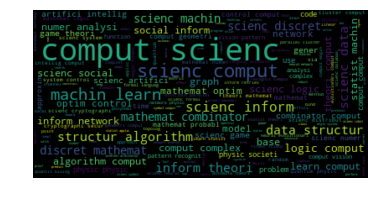

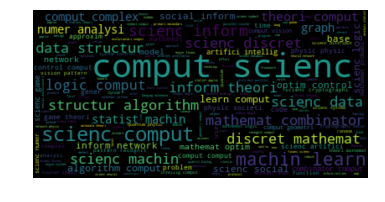

In [20]:
# instalar pip install wordcloud
import os

from os import path
from wordcloud import WordCloud

text = ' '.join(map(str,clean_train_words))
# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
